In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.random.randint(-7,500,200)

#normalization of values
u=np.mean(x,axis=0)
std=np.std(x,axis=0)
x=(x-u)/std

In [3]:
x

array([-0.30732186, -1.56307461,  0.48933849, -1.50906374, -0.84067921,
        1.19823117, -0.0710243 , -0.40184088, -0.71915475, -0.3815868 ,
       -1.75211266, -0.23305691, -0.26006234, -0.32082457,  0.0775056 ,
        0.63786839,  0.40832218, -1.30652297, -1.04997133, -0.96220367,
       -0.90144144, -0.26006234,  0.77964692,  0.73238741,  0.64461975,
       -1.50231238,  1.53579912,  1.31975563,  1.36701515,  0.05050016,
       -1.43479879,  0.73913877, -1.54282053, -1.17149579, -0.15879196,
       -1.07022541, -0.57062485,  0.28679773,  1.42777737,  0.98893905,
        0.50959257, -0.86093328, -1.29977161,  0.07075424,  1.21848525,
        0.05725152,  0.71888469, -1.17824715,  0.98893905, -0.11153245,
       -1.22550666,  1.50204232,  1.44128009, -0.11153245, -0.10478109,
        0.46233306,  0.71888469,  1.50879368, -1.81287489, -0.17904604,
       -1.79937217, -1.08372813,  1.08345807, -1.60358276, -1.07022541,
       -1.65084227, -1.52256645, -1.33352841,  1.4885396 ,  0.32

In [4]:
y = []

for i in x: #y=mx+c
    y.append(7.81*i + 6.022)

In [5]:
y

[3.6218163045431693,
 -6.185612679529125,
 9.84373361701914,
 -5.76378777698838,
 -0.5437046080466761,
 15.380185462866402,
 5.467300253158923,
 2.8836227250968673,
 0.405401422669998,
 3.041807063549646,
 -7.661999838421728,
 4.201825545536692,
 3.9909130942663196,
 3.516360078907983,
 6.627318735145969,
 11.003752099006185,
 9.210996263208024,
 -4.181944392460592,
 -2.17827610539206,
 -1.4928106387633493,
 -1.0182576234050131,
 3.9909130942663196,
 12.111042468175638,
 11.741945678452488,
 11.056480211823779,
 -5.711059664170788,
 18.01659110374605,
 16.329291493583078,
 16.69838828330623,
 6.416406283875597,
 -5.183778535994859,
 11.79467379127008,
 -6.027428341076346,
 -3.127382136108732,
 4.781834786530214,
 -2.336460443844837,
 1.565419904657043,
 8.26189023249135,
 17.172941298664565,
 13.74561396552102,
 10.001917955471919,
 -0.7018889464994551,
 -4.129216279642998,
 6.574590622328375,
 15.538369801319181,
 6.46913439669319,
 11.636489452817301,
 -3.1801102489263258,
 13.745613

In [6]:
y = np.array(y)

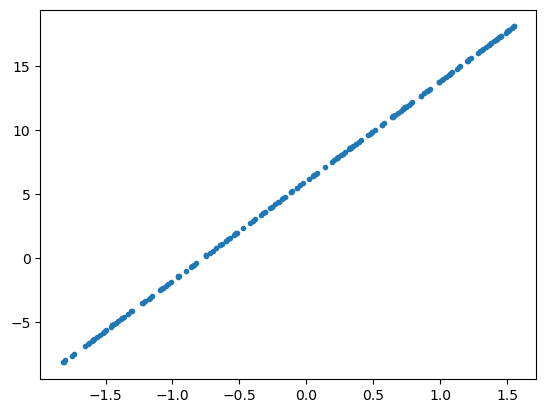

In [7]:
#we are using scatter function coz both x and y are discrete but we can also use plt.plot() because y=mx+c is continuous
plt.scatter(x, y, marker = '.')
plt.show()

In [8]:
#for prediction of value
def hypothesis(x, weights):
    #y =c+mx we want the prediction value to follow y=mx+c to predict value and it has to learn m and c by itself
    y_pred = weights[0] + weights[1] * x
    return y_pred

In [9]:
#we are taking x and weights as parameter beacuse in loss function we want y_pred and we are finding y_pred with x and weight in hypothesis function
def loss_func(x, weights, y):
    loss = 0
    
    for i in range(x.shape[0]):
        y_pred = hypothesis(x[i], weights)
        loss += (y_pred - y[i])**2
        
    return loss/x.shape[0] #we can divide by 2 but we prefer x.shape[0],by dividing it with x.shape[0] we will expand the parabola that will made by loss

In [10]:
#gradient=dJ/dW
def gradient(x, y,weights):
    grad = np.zeros((2,))       
    
    for i in range(x.shape[0]):
        y_pred = hypothesis(x[i], weights)
        
        
        grad[0] += (y_pred - y[i]) * 1 #where 1 = x(0) #here we have not written x[i] coz x0=1
        grad[1] += (y_pred - y[i]) * x[i]
    
    return grad/x.shape[0]
    

In [11]:
print(x.shape)
print(x.shape[0])

(200,)
200


In [46]:
def gradient_descent(x, y):
    weights = np.zeros((2,))
    lr_rate = 0.003
    loss_epoch = []
    
    epochs = 5000  #it is the jump we have let to reach global minima
    
    for i in range(epochs):
        grad = gradient(x, y, weights)     
        
        weights[0] = weights[0]- lr_rate * grad[0]
        weights[1] = weights[1]- lr_rate * grad[1]
        
        loss_epoch.append(loss_func(x, weights, y))

    return weights, loss_epoch

In [47]:
weights, loss_epoch = gradient_descent(x, y)

In [48]:
loss_epoch

[96.67789584125599,
 96.09869856727101,
 95.52297126415456,
 94.95069314331099,
 94.38184354068943,
 93.81640191603715,
 93.2543478521582,
 92.69566105417583,
 92.14032134880034,
 91.58830868359969,
 91.03960312627618,
 90.49418486394664,
 89.95203420242673,
 89.41313156552,
 88.87745749431102,
 88.34499264646257,
 87.81571779551761,
 87.28961383020467,
 86.7666617537479,
 86.24684268318119,
 85.73013784866629,
 85.2165285928149,
 84.70599637001537,
 84.19852274576256,
 83.69408939599272,
 83.1926781064213,
 82.6942707718858,
 82.19884939569135,
 81.70639608896182,
 81.21689306999282,
 80.73032266361052,
 80.24666730053285,
 79.76590951673533,
 79.28803195282055,
 78.81301735339123,
 78.34084856642701,
 77.87150854266558,
 77.40498033498645,
 76.94124709779952,
 76.48029208643662,
 76.02209865654685,
 75.56665026349543,
 75.11393046176684,
 74.66392290437042,
 74.21661134225036,
 73.77197962369887,
 73.33001169377332,
 72.89069159371599,
 72.45400346037802,
 72.01993152564687,
 71.5884

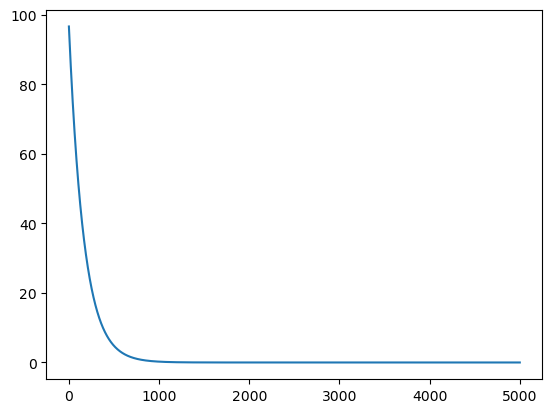

In [49]:
plt.plot(loss_epoch)
plt.show()

In [50]:
weights

array([6.0219982 , 7.80999766])

In [51]:
print(weights[0]+weights[1]*3)

29.45199119141093
